In [1]:
import platform
import numpy as np
import matplotlib
import PIL
import cv2
import torch

print("Python version:", platform.python_version())
print("Numpy version:", np.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Pillow version:", PIL.__version__)
print("OpenCV version:", cv2.__version__)
print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())


Python version: 3.9.25
Numpy version: 2.0.2
Matplotlib version: 3.9.4
Pillow version: 11.3.0
OpenCV version: 4.12.0
PyTorch version: 2.5.1+cu121
CUDA available: True


## **Partie 1 : Concepts de base de la vision par ordinateur**
### **Exercice 1 : Analyse d’une image**

but :
- Afficher une image en utilisant OpenCV.
- Convertir l'image en niveaux de gris et afficher le résultat.
- Appliquer un filtre de détection de contours (Canny) et afficher le résultat.

In [80]:
import cv2

# 1. Charger une image
image = cv2.imread("image.jpg")

# 2. Afficher l'image originale
cv2.imshow("Image originale", image)  # image est une matrice Numpy

# Attendre une touche pour fermer les fenêtres
cv2.waitKey(0) # attend que tu appuies sur une touche pour continuer.
cv2.destroyAllWindows() # ferme toutes les fenêtres ouvertes par OpenCV.

In [82]:
# 3. Conversion en niveaux de gris
image_gris = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow("Image en niveaux de gris", image_gris)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [84]:
# 4. Détection de contours (Canny)
contours = cv2.Canny(image_gris, 100, 200)  # seuils bas et haut
cv2.imshow("Contours (Canny)", contours)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### **1. Que représente la matrice retournée par OpenCV pour l’image ?**

OpenCV retourne une matrice NumPy qui représente tous les pixels de l’image, ce qui va permettre de manipuler l'image pour appliquer des filtres, transformations, etc.

- Pour une image couleur (RGB ou BGR) :
La matrice a 3 dimensions : (hauteur, largeur, 3), chaque élément de la matrice correspond à un pixel.
Les 3 canaux représentent les intensités de couleur ( OpenCV utilise l’ordre BGR -> Blue, Green, Red)

- Pour une image en niveaux de gris :
La matrice a 2 dimensions : (hauteur, largeur), chaque élément est un entier entre 0 et 255, représentant l’intensité lumineuse du pixel (0 = noir, 255 = blanc).

#### **2. Pourquoi convertit-on souvent l’image en niveaux de gris avant traitement ?**

**- Simplicité et rapidité :** 

Une image couleur a 3 canaux à traiter, alors qu’une image en gris n’en a qu’un seul, donc on aura un traitement plus rapide (détection de contours, seuillage, etc.).

**- Algorithmes de vision qui ne nécessitent pas la couleur:**

Beaucoup de traitements (détection de contours, détection de formes, reconnaissance de textures) ne dépendent que de l’intensité lumineuse, pas de la couleur.

**- Réduction du bruit et des variations de couleur :**

La conversion en gris réduit l’influence des variations de couleur qui peuvent gêner certains algorithmes.


## **Partie 2 : Traitement d’images et vidéos avec OpenCV**
### **Exercice 2 : Lecture vidéo / webcam**

but :
- Afficher la vidéo de webcam.
- Ajouter un filtre pour convertir la vidéo en niveaux de gris en temps réel.
- Fermer la vidéo quand l’utilisateur appuie sur q.

In [40]:
cap = cv2.VideoCapture(0)  # 0 pour webcam, ou nom du fichier vidéo

while True:
    ret, frame = cap.read()  # ret : un booléen qui indique si la lecture a réussi   # frame : la matrice NumPy de l’image capturée.
    if not ret:
        break 
    # Afficher la vidéo
    cv2.imshow("Webcam", frame)   
    
    # Appuyer sur 'q' pour quitter 
    if cv2.waitKey(1) & 0xFF == ord('q'): # Le & 0xFF est utilisé pour compatibilité entre systèmes
        break
cap.release()
cv2.destroyAllWindows()

2. Ajoutez un filtre pour convertir la vidéo en niveaux de gris en temps réel.

In [44]:
cap = cv2.VideoCapture(0)  # 0 pour webcam, ou nom du fichier vidéo

while True:
    ret, frame = cap.read()
    if not ret:
        break
        
    # Convertir en niveaux de gris
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) 
    cv2.imshow("Webcam - Niveaux de gris", gray)   # Afficher la vidéo
    
    # Appuyer sur 'q' pour quitter
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

#### **- Que se passe-t-il si vous utilisez une vidéo enregistrée à la place de la webcam ?**

On doit remplacer "0" dans "cap = cv2.VideoCapture(0)" par le chemin d’un fichier vidéo. Dans ce cas:
- la lecture s’arrête automatiquement à la fin de la vidéo, car ret deviendra False.
- La vitesse d’affichage dépend de cv2.waitKey() et de la cadence des images dans la vidéo.


In [74]:
# Pour respecter le timing original de la vidéo, on peut faire :
# fps = cap.get(cv2.CAP_PROP_FPS)
# cv2.waitKey(int(1000/fps))

## **Partie 3 : Détection et segmentation d’objets avec Detectron2**
### **Exercice 3 : Détection d’objets**

but :
- Charger une image contenant plusieurs objets (image_objects.jpg).
- Utiliser un modèle pré-entraîné Mask R-CNN de Detectron2 pour détecter et segmenter
les objets.
- Afficher l’image avec les masques colorés et les étiquettes

model_final_f10217.pkl: 178MB [04:18, 688kB/s]                                
C:\Users\pc\anaconda3\envs\cv2\lib\site-packages\torch\functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3596.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


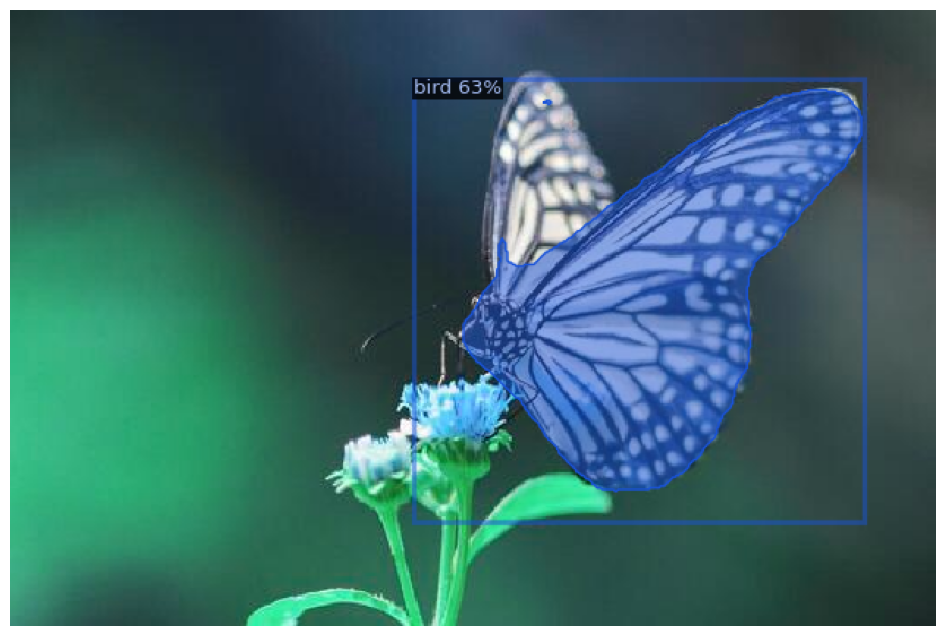

In [86]:
import cv2
import torch
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
import matplotlib.pyplot as plt

# Configuration du modèle pré-entraîné
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file(
    "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # signifie que seules les détections avec une confiance ≥ 50% seront affichées.
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(
    "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
)
predictor = DefaultPredictor(cfg)

# Charger une image
img = cv2.imread("image.jpg")

# Prédiction
outputs = predictor(img)

# Visualisation
v = Visualizer(img[:, :, ::-1],                      # convertit BGR → RGB (OpenCV lit en BGR, Detectron2 attend RGB).
               MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

# Affichage
img_rgb = out.get_image()[:, :, ::-1]  # Convertir l'image en RGB pour matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

#### **2. Modifiez le seuil SCORE_THRESH_TEST et observez l’effet sur la détection.**

- Si on augmente le seuil, moins d’objets seront affichés, mais les détections seront plus fiables.
- Si on baisse le seuil : plus d’objets seront affichés, y compris ceux avec faible confiance (plus de faux positifs possibles).

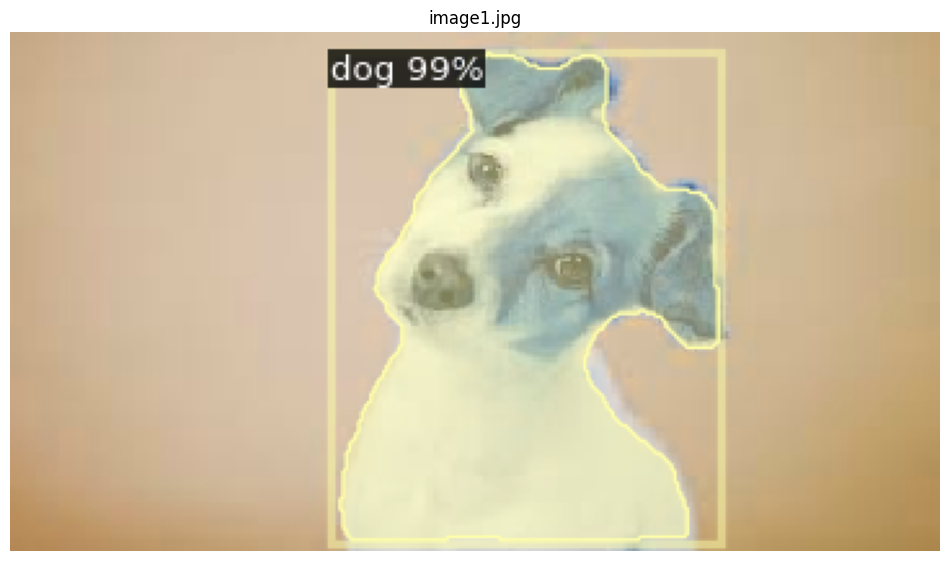

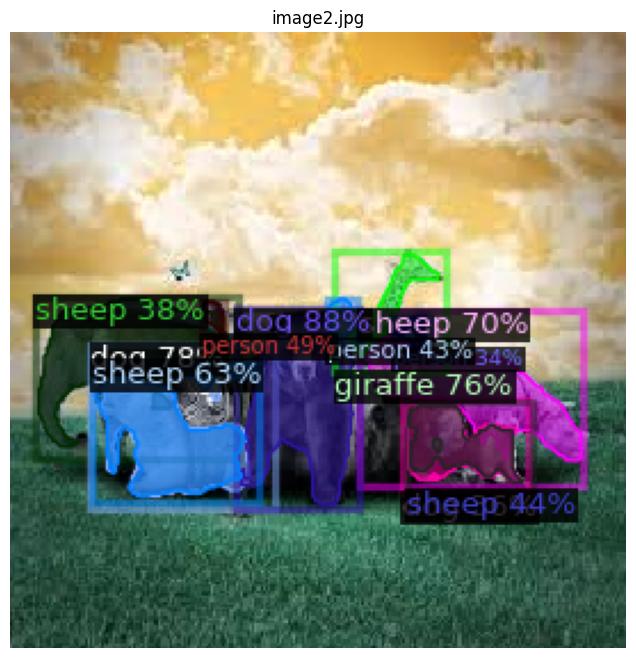

In [102]:
import os

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file(
    "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.3  # seuil de confiance
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(
    "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
)
cfg.MODEL.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

predictor = DefaultPredictor(cfg)

folder_path = "./images"  

# Lister toutes les images du dossier
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith((".jpg", ".jpeg", ".png"))]

for img_file in image_files:
    img_path = os.path.join(folder_path, img_file)
    img = cv2.imread(img_path)
    if img is None:
        print(f"Impossible de charger {img_file}")
        continue

    # Prédiction
    outputs = predictor(img)

    # Visualisation
    v = Visualizer(
        img[:, :, ::-1],  # BGR -> RGB
        MetadataCatalog.get(cfg.DATASETS.TRAIN[0]),
        scale=1.2
    )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    img_rgb = out.get_image()[:, :, ::-1]  # RGB pour matplotlib

    # Affichage
    plt.figure(figsize=(12, 8))
    plt.imshow(img_rgb)
    plt.title(img_file)
    plt.axis('off')
    plt.show()


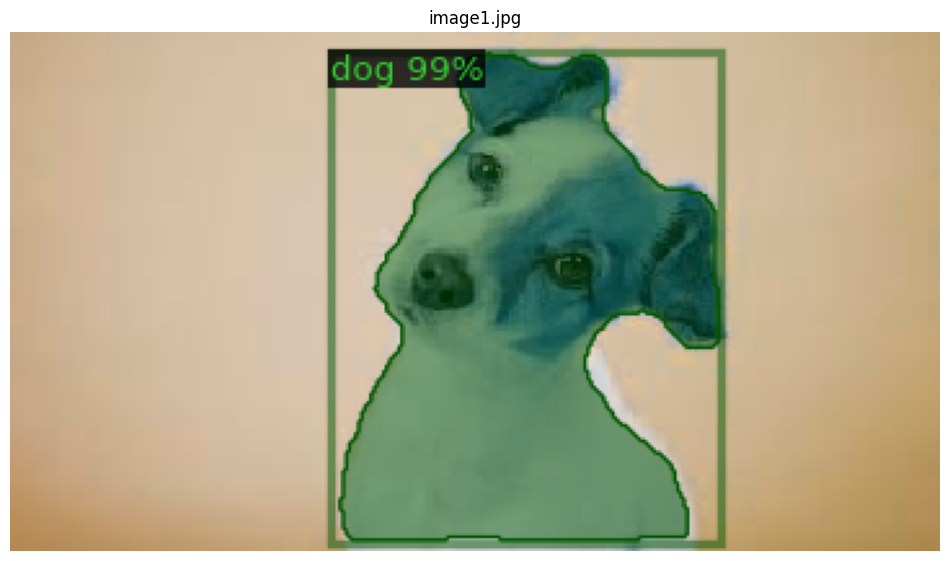

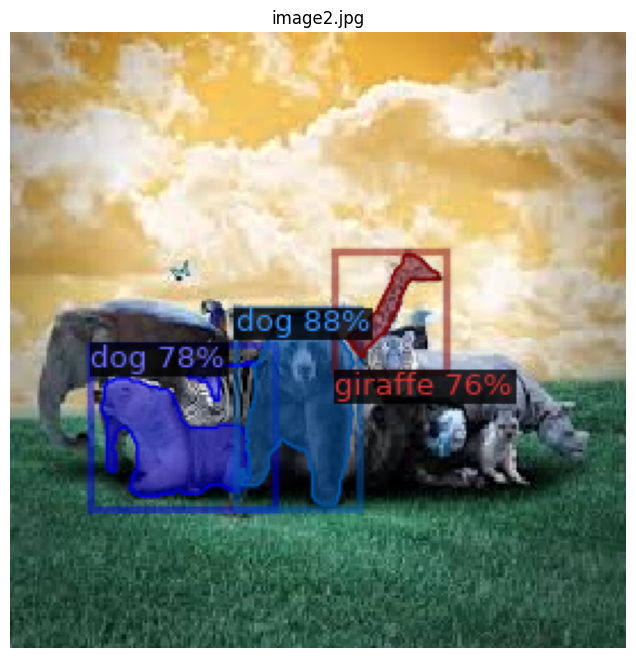

In [106]:
import os

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file(
    "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # seuil de confiance
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(
    "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
)
cfg.MODEL.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

predictor = DefaultPredictor(cfg)

folder_path = "./images"  

# Lister toutes les images du dossier
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith((".jpg", ".jpeg", ".png"))]

for img_file in image_files:
    img_path = os.path.join(folder_path, img_file)
    img = cv2.imread(img_path)
    if img is None:
        print(f"Impossible de charger {img_file}")
        continue

    # Prédiction
    outputs = predictor(img)

    # Visualisation
    v = Visualizer(
        img[:, :, ::-1],  # BGR -> RGB
        MetadataCatalog.get(cfg.DATASETS.TRAIN[0]),
        scale=1.2
    )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    img_rgb = out.get_image()[:, :, ::-1]  # RGB pour matplotlib

    # Affichage
    plt.figure(figsize=(12, 8))
    plt.imshow(img_rgb)
    plt.title(img_file)
    plt.axis('off')
    plt.show()


## **Partie 4 : Détection et reconnaissance faciale avec Dlib**
### **Exercice 4 : Détection faciale**

but:
- Charger une image contenant un ou plusieurs visages (people.jpg).
- Détecter tous les visages et entourez-les de rectangles verts.

In [33]:
#!pip install cmake
#!pip install dlib face_recognition

In [13]:
import dlib # bibliothèque pour la vision par ordinateur, contient des détecteurs de visages pré-entraînés.
import cv2 # utilisé ici pour lire l’image et dessiner les rectangles autour des visages.
import numpy as np

detector = dlib.get_frontal_face_detector()   # charge le détecteur de visage pré-entraîné fourni par dlib.

# Charger l'image
img = cv2.imread("people.jpg")
if img is None:
    raise ValueError("Impossible de charger l'image ! Vérifie le chemin.")

print(img.shape, img.dtype)    # dimensions et type

# S'assurer que l'image est 8-bit
if img.dtype != np.uint8:
    img = cv2.convertScaleAbs(img)  # convertit automatiquement en uint8
    
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # convertit l’image en niveaux de gris (détecteur de dlib fonctionne sur des images en niveaux de gris)

print(gray.shape, gray.dtype)
faces = detector(gray)  # applique le détecteur , Renvoie une liste de rectangles (dlib.rectangle) pour chaque visage détecté.
for face in faces:
    x, y, w, h = face.left(), face.top(), face.width(), face.height()
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)  # dessine un rectangle vert (0,255,0) autour du visage avec une épaisseur de 2 pixels.

# Affichage
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

(183, 275, 3) uint8
(183, 275) uint8


RuntimeError: Unsupported image type, must be 8bit gray or RGB image.

In [13]:
import numpy as np
import dlib

detector = dlib.get_frontal_face_detector()

# Crée une image artificielle 8-bit
img = np.zeros((200, 200), dtype=np.uint8)
faces = detector(img)  # ça doit fonctionner (0 visage)
print(faces)


RuntimeError: Unsupported image type, must be 8bit gray or RGB image.

### **Exercice 5 : Reconnaissance faciale**

but :
- Charger une image de référence (ref.jpg) et une image test (test.jpg).
- Comparer les visages et indiquez si c’est la même personne.

In [ ]:
# Installer les dépendances

In [9]:
import face_recognition
import os
import cv2

# Désactiver CUDA pour dlib
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

img = cv2.imread("people.jpg")
cv2.imwrite("people_fixed.jpg", img)  # réécriture de l'image

# Charger les images
image_ref = face_recognition.load_image_file("people_fixed.jpg")
print(image_ref.dtype, image_ref.shape)  # doit afficher: uint8 (H, W, 3)

encodage_ref = face_recognition.face_encodings(image_ref)
encodages_ref = face_recognition.face_encodings(image_ref)
if len(encodages_ref) == 0:
    raise ValueError("Aucun visage détecté dans image_ref !")
encodage_ref = encodages_ref[0]

image_test = face_recognition.load_image_file("people.jpg")
encodage_test = face_recognition.face_encodings(image_test)[0]

# Comparer
result = face_recognition.compare_faces([encodage_ref], encodage_test)
print("Même personne ?", result[0])

uint8 (183, 275, 3)


RuntimeError: Unsupported image type, must be 8bit gray or RGB image.

**- Que se passe-t-il si l’image test contient plusieurs visages ?**

**- Quelle précision attendez-vous de ce système dans des conditions réelles (lumière, angles différents) ?**